# Manipulating data with Python and Numpy

The goal of this notebook is to start manipulating data with Python and Numpy. We will use scikit-learn only to load the data.

The data you'll be working with today is called the `digit` dataset. It contains digital images of handwritten digits.

This notebook was created by [Chloé-Agathe Azencott](http://cazencott.info), inspired by [Alexandre Gramfort](http://alexandre.gramfort.net/).

## 1. How to use Jupyter

Jupyter is a web application that allows you to create and share documents such as this one, called  _notebooks_, which have extension `.ipynb`. They contain code that can be modified and executed, visualisations, and explanatory text that can be edited with a markdown syntax and contain equations.)

Here are some tips on using a Jupyter notebook:
* Each block of text is contained in a _cell_. A cell can be either raw text, code, or markdown text (such as this cell). For more info on markdown syntax, follow the [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html).
* You can run a cell by clicking inside it and hitting `Shift+Enter` (or the play button in the toolbar).

In [ ]:
2 + 2  # hit Shift+Enter to run

* If you want to create a new cell below the one you're running, hit `Alt+Enter` (or the plus button in the toolbar).
* If the notebook hangs, you can restart it with "Restart" in the "Kernel" menu.

Some tips on using a Jupyter notebook with Python:
* A notebook behaves like an interactive python shell! This means that
    * classes, functions, and variables defined at the cell level have global scope throughout the notebok
    * hitting `Tab` will autocomplete the keyword you have started typing
    * typing a question mark after a function name will load the interactive help for this function.
* Jupyter has special Python commands (shortcuts, if you will) called _magics_. For instance, `%bash` will allow you to run bash code, `%paste` will allow you to paste a block of code while retaining its formating, and `%matplotlib inline` will import the visualization library matplotlib, and automatically display its plots inline, that is, below the cell. Here's a full list: http://ipython.readthedocs.io/en/stable/interactive/magics.html 
* Learn more about the interactive Python shell here: http://ipython.readthedocs.io/en/stable/interactive/tutorial.html

For more info on Jupyter: https://jupyter.org/

## 2. Loading the data

Let us start with a jupyter _magic_:

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


This magic is equivalent to: 

```python 
import numpy as np
import matplotlib.plot as plt```

The `inline` keyword specifies that we want our figures to appear inside the notebook and not in separate windows. 

Numpy (stands for Numerical Python) is the Python library for numerical computations, and in particular for the manipulation of vectors and matrices.

Matplotlib is a plotting library.

In this series of labs, we will heavily rely on the `scikit-learn` library for machine learning in Python. In this first notebook, however, we will only use it to load one of the classical data sets that it makes available.

In [6]:
# Load data
from sklearn import datasets 

digits = datasets.load_digits()

# Get descriptors and target to predict
X, y = digits.data, digits.target

We have loaded the data into two _numpy arrays_ X and y. X is a two-dimensional array (i.e. a matrix), containing the samples as rows and the features describing them as columns; y is a one-dimensional array (i.e. a vector), containing the labels.

The dimension of an array is accessible via its `shape` attribute:

In [3]:
print X.shape

(1797, 64)


In [4]:
# Get the shape of the data
print "Number of samples: %d" % X.shape[0]
print "Number of pixels: %d" % X.shape[1]
print "Number of classes: %d" % len(np.unique(y)) # number of unique values in y

Number of samples: 1797
Number of pixels: 64
Number of classes: 10


We have loaded 1797 images, each containing 64 pixels (they are 8 x 8 images), and belonging to one of 10 classes (the digits from 0 to 9).

In [7]:
# Pick one sample to "visualize" it
sample_idx = 42

print X[sample_idx, :]

print y[sample_idx]

[ 0.  0.  0.  0. 12.  5.  0.  0.  0.  0.  0.  2. 16. 12.  0.  0.  0.  0.
  1. 12. 16. 11.  0.  0.  0.  2. 12. 16. 16. 10.  0.  0.  0.  6. 11.  5.
 15.  6.  0.  0.  0.  0.  0.  1. 16.  9.  0.  0.  0.  0.  0.  2. 16. 11.
  0.  0.  0.  0.  0.  3. 16.  8.  0.  0.]
1


__Question 1:__ 
* What is the type of X? Of its entries?
* What is the type of y? Of its entries?
* Play with different values for `sample_idx`. Can you guess `y[sample_idx`]?

In [10]:
# TODO

## 3. Visualizing the data

Each sample is a scanned image, of size 8x8, containing 64 pixels. They have been flattened out to a vector of size 64, such as `X[sample_idx, :]`. Each entry of that vector is the intensity of the corresponding pixel.

Let us now visualize the original image.

In [11]:
# Reshape the vector X[sample_idx] in a 2D, 8x8 matrix
sample_image = np.reshape(X[sample_idx, :], (8, 8))
print sample_image.shape

(8, 8)


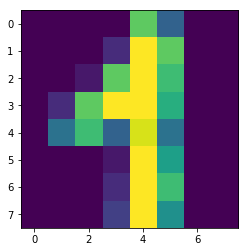

In [12]:
# Display the corresponding image
plt.imshow(sample_image)

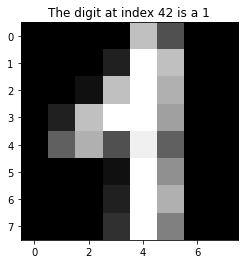

In [15]:
# Let us improve visualization by using grayscale plotting 
plt.imshow(sample_image, cmap='gray')

# Give the plot of title
plt.title('The digit at index %d is a %d' % (sample_idx, y[sample_idx]))

__Question 2:__ 
Visualize a few of the digits in the data set.

In [17]:
# TODO

## 4. Mean image in each class

In order to better understand the data, we will compute, for each class, the mean data point, and visualize it as an image.

In [18]:
# Get all possible classes
classes_list = np.unique(y).astype(int)
print "Classes in our data: ", classes_list

Classes in our data:  [0 1 2 3 4 5 6 7 8 9]


__Question 3:__
Complete the code below to compute the mean image for every digit in the data set.

The mean image of all images representing a 0 is an image where the pixel of coordinates (i, j) takes the average value of all (i, j) pixels among images of 0.

In [ ]:
# For plotting
fig = plt.figure()

for idx in classes_list:
    ax = fig.add_subplot(3, 4, idx+1) # plot number (idx+1) on a 3x4 grid
    # Get indices of images of class idx
    images_indices = np.where( # TODO
    
    # Get the corresponding pixel descriptions
    images = X[images_indices, :]
    
    # Compute the mean of these values
    mean_image_pixels = # TODO
    
    # Transform into an 8x8 image
    mean_image = # TODO
    
    ax.imshow(mean_image, cmap='gray')